### Telco Customer Churn EDA
Customer Churn occurs when customers or subscribers stop doing business with a company or service. A company that has a high churn rate is losing a significant amount of revenue, as acquiring new customers often costs more than retaining existing ones.

### 1.Import Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    )
import shap
import joblib
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

### 2. Load Dataset


In [120]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. Initial Data Inspection

In [121]:
df.shape

(7043, 21)

In [122]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [123]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 4.Data Cleaning

In [124]:
# Clean column names (removes extra spaces)
df.columns = df.columns.str.strip()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
print(df.isna().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Drop customerID column safely (no error if it doesn't exist)
df.drop(columns=['customerID'], errors='ignore', inplace=True)
 # Target Encoding
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


### 5. Exploratory Data Analysis(EDA)

### 5.1 Churn Distribution

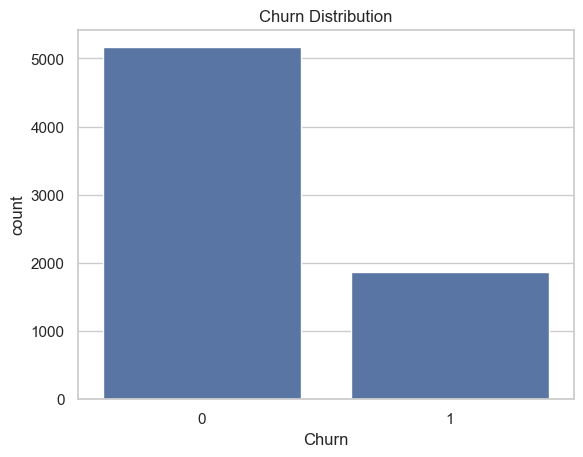

In [125]:
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.show()

### 5.2 Tenure vs Chrun

### Tenure 
how long a customer has been with the company

In the Telco Customer Churn dataset:

tenure is the number of months a customer has stayed with the company

So:

tenure = 1 → customer joined last month

tenure = 12 → customer has been with the company 1 year

tenure = 60 → customer has been with the company 5 years

### Churn
  when a customer stops using a company’s product or service

In simple terms:

A churned customer has left the company.

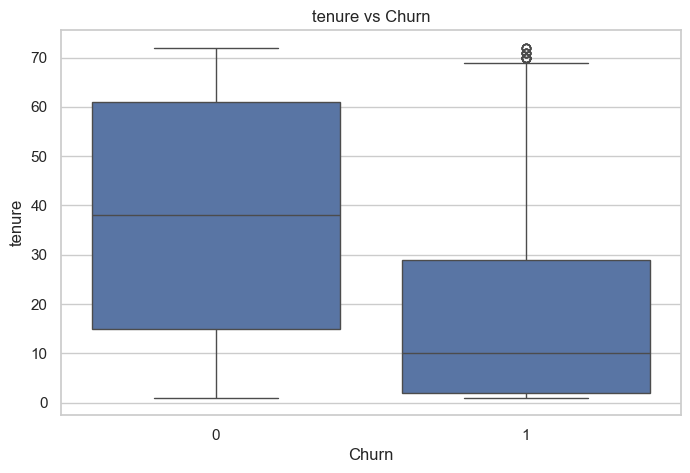

In [126]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Churn'], y=df['tenure'])
plt.title("tenure vs Churn")
plt.show()

### 5.3 Monthly Charges vs Churn


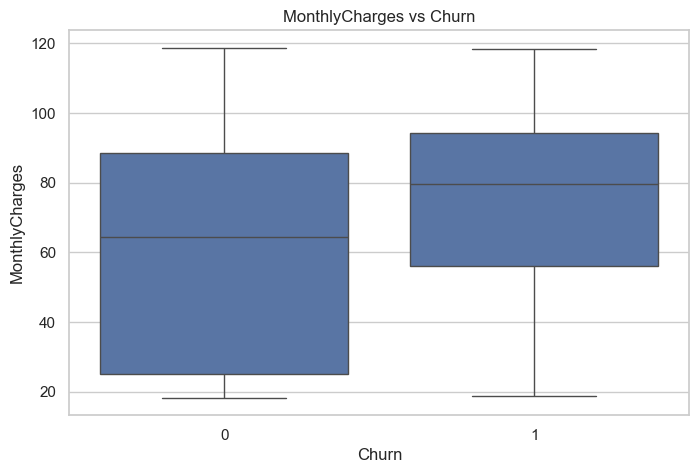

In [127]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'])
plt.title("MonthlyCharges vs Churn")
plt.show()

### 5.4 Contract Vs Churn

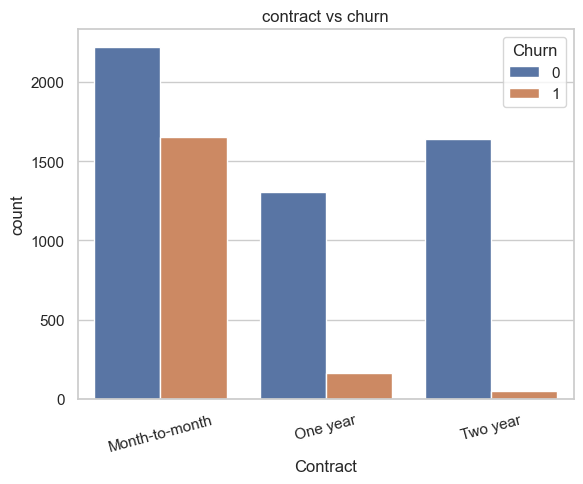

In [128]:
sns.countplot(x=df['Contract'], hue=df['Churn'])
plt.title("contract vs churn")
plt.xticks(rotation=15)
plt.show()

### 6.Feature Engineering

Feature engineering   is creating, transforming, or selecting input variables (features) so machine-learning models can learn better patterns.

In plain English:

You take raw data and turn it into something the model can actually understand and use effectively.

In [129]:
# new features
df['AvgChargesPerMonth']= df['TotalCharges']/(df['tenure']+1) # to avoid dividon by zero

#seperate categorical  colums
cat_cols=df.select_dtypes(include=['object']).columns

#one-hot encoding
df_encoded=pd.get_dummies(df,columns=cat_cols, drop_first=True)
x=df_encoded.drop('Churn',axis=1)
y=df_encoded['Churn']
feature_names=x.columns

C:\Users\Zafar Nadeem\AppData\Local\Temp\ipykernel_5172\2634595427.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols=df.select_dtypes(include=['object']).columns


### 7.Train-Test Split and Scaling

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42,stratify=y
    )
scaler =StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### 8.Model Training & Hyperparamerter Tuning

### What is Model Training?

It teaching a machine-learning algorithm to learn patterns from data.

In this churn project:

Input (X) → customer features (tenure, charges, contract, etc.)

Output (y) → Churn (0 = No, 1 = Yes)

The model learns:

“Customers with these characteristics are more likely to churn.”

### What are Hyperparameters?

Hyperparameters are settings you choose before training.

Examples:

Logistic Regression → C

Random Forest → n_estimators, max_depth

XGBoost → learning_rate, max_depth

They control how the model learns, not what it learns.

### What is Hyperparameter Tuning?

It systematically trying different settings and choosing the best one.

We do this because:

Default parameters are rarely optimal

Better parameters → better performance


### 8.1 Logistic Regression

In [131]:
lr=LogisticRegression(max_iter=1000)

lr_params={
    "C":[0.01,0.1, 1, 10]
}
lr_grid=GridSearchCV(lr, lr_params, cv=5, scoring='roc_auc')
lr_grid.fit(X_train_scaled, y_train)
best_lr= lr_grid.best_estimator_

### 8.2. Random Forest

In [132]:
rf=RandomForestClassifier(random_state=42)

rf_params={
    "n_estimators":[100,200],
    "max_depth":[None,10,20],
}
rf_grid=GridSearchCV(rf,rf_params,cv=5,scoring='roc_auc')
rf_grid.fit(X_train, y_train)
best_rf=rf_grid.best_estimator_



### 8.3 XGBoost

### What is XGBoost?

XGBoost = Extreme Gradient Boosting

It’s a powerful tree-based machine learning algorithm that:

Builds many small decision trees

Each new tree fixes the mistakes of the previous ones

Combines them into a very strong model

That’s why it often wins Kaggle competitions 

### Why XGBoost is GREAT for Churn

Churn data usually has:

Non-linear relationships

Feature interactions

Mixed feature importance

XGBoost handles all of that better than Logistic Regression or Random Forest.

In [133]:
xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

xgb_params = {
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "n_estimators": [200, 300]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring="roc_auc")
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_


### 9. Model Evaluation

In [134]:
models={
    "logistic_regression": best_lr,
    "random_forest": best_rf,
    "xgboost": best_xgb
}

for name,model in models.items():
    if name=="Logistic Regression":
        preds=model.predict(X_test_scaled)
        probs=model.predict_proba(X_test_scaled)[:,1]
    else:
            preds=model.predict(X_test)
            probs=model.predict_proba(X_test)[:,1]
            
            print("="*40)
            print(name)
            print(classification_report(y_test, preds))
            print("ROC AUC:", roc_auc_score(y_test,probs))

c:\Users\Zafar Nadeem\Desktop\customer chrun telo projrct\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Zafar Nadeem\Desktop\customer chrun telo projrct\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


logistic_regression
              precision    recall  f1-score   support

           0       0.43      0.10      0.16      1033
           1       0.21      0.65      0.31       374

    accuracy                           0.24      1407
   macro avg       0.32      0.37      0.24      1407
weighted avg       0.37      0.24      0.20      1407

ROC AUC: 0.35866149680852727
random_forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC: 0.8341663603750044
xgboost
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      

### 10.Best Model Selection

In [135]:
best_model = best_xgb


### 11.SHAP  Interpretability
### What is SHAP Interpretability?

SHAP = SHapley Additive exPlanations

It explains:

How much each feature contributed to a prediction

For churn:

Why this customer churned

Which features increase/decrease churn risk

Global + individual explanations

### Simple Intuition

Think of a prediction as a bill split:

Each feature “pays” part of the final prediction

SHAP tells you who paid how much

Positive SHAP value → increases churn
Negative SHAP value → decreases churn

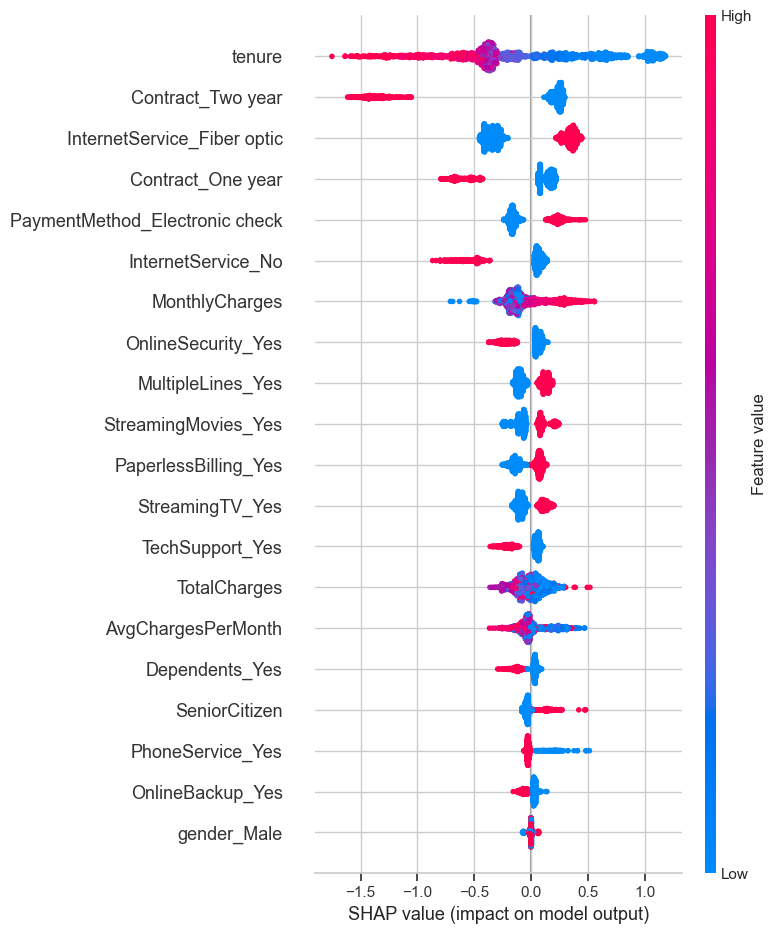

In [136]:


shap.initjs()

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)



### 12.Save Model

In [137]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(best_model, "../models/best_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("Model and scaler saved successfully ✅")
os.listdir("../models")# to check it is working or not


Model and scaler saved successfully ✅


['best_model.pkl', 'scaler.pkl']

### 13.Business Recommendation and Insights

### Key Drivers of Churn
- Month-to-month contracts
- High monthly charges
- Low tenure customers
- Fiber optic internet users

### Business Recommendations
- Incentivize long-term contracts
- Target customers in first 6 months
- Provide loyalty discounts for high-paying users
- Improve fiber customer experience
